# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import datetime
from google.colab import files
from statsmodels.tsa.arima_model import ARIMA
import csv


# Reading excel file

In [ ]:
df = pd.read_excel('Extract.xlsx',sheet_name=0)
df

,y,x1,x2,x3,x4
0,0.0,3861.22,3861.66,3860.75,3861.38
1,0.0,3861.19,3861.38,3860.16,3861.25
2,0.0,3861.38,3861.38,3858.47,3858.53
3,1.0,3858.72,3858.72,3857.03,3858.19
4,1.0,3858.09,3859.16,3858.03,3858.81
...,...,...,...,...,...
9995,0.0,3794.75,3795.00,3793.75,3794.88
9996,1.0,3794.78,3795.09,3794.53,3794.72
9997,0.0,3794.75,3795.09,3794.47,3794.91
9998,1.0,3794.94,3795.13,3793.38,3794.34


LOGISTIC REGRESSION

In [ ]:
features = ['x1','x2','x3','x4']
x, y = df[features], df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False )

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

0.5004

In [ ]:
clf.score(x, y) # logistic regression accuracy

0.5039

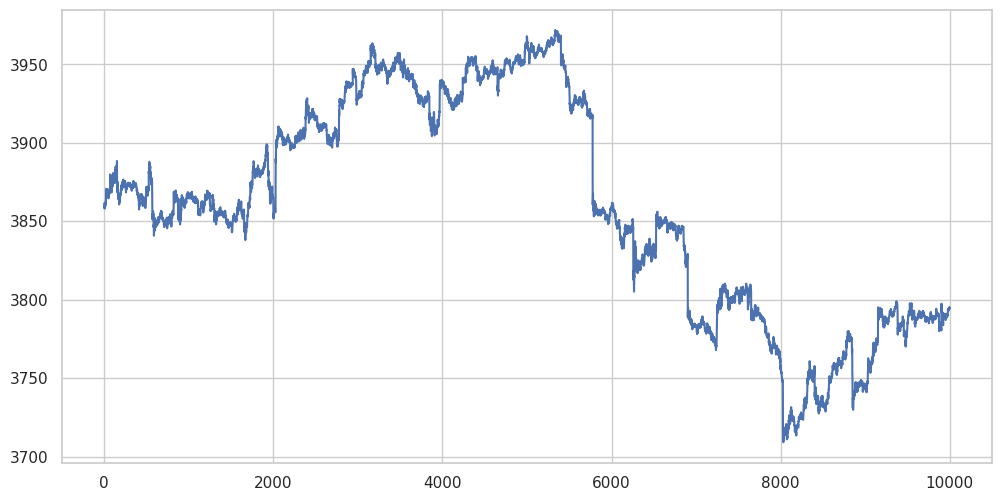

In [ ]:
v = [i for i in range(10000)]
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df['x4'])
#plt.scatter(v, 3700+(df['y']*200), s= 0.01)

# Applying ARIMA

In [ ]:
series = df['x4']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.x4   No. Observations:                 9999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18984.756
Method:                       css-mle   S.D. of innovations              1.616
Date:                Sat, 12 Feb 2022   AIC                          37983.512
Time:                        13:29:13   BIC                          38033.983
Sample:                             1   HQIC                         38000.596
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.016     -0.409      0.682      -0.039       0.025
ar.L1.D.x4     0.0307      0.010      3.077      0.002       0.011       0.050
ar.L2.D.x4    -0.0295      0.010     -2.952      0.0

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
Tr = X[size:len(X)]
plt.figure(figsize=(12, 6), dpi=100)
#plt.plot(predictions)
diff = [Tr[i]-predictions[i][0] for i in range(len(Tr))]
plt.plot(diff)

In [ ]:
#y_pr = [1 for i in range(len(predictions)-1) if predictions[i+1][0]>=Tr[i] else 0]
y_or1 = df['y'].values[size:len(X)-1]
y_pr = []
y_or = []
c = 0.1
for i in range(len(predictions)-1):
  if (predictions[i+1][0]>=Tr[i]+c) or (predictions[i+1][0]<=Tr[i]-c): 
    if predictions[i+1][0]>=Tr[i]:
      y_pr.append(1)
    else:
      y_pr.append(0)
    y_or.append(y_or1[i])
len(y_pr)

In [ ]:
ans = 0
for i in range(len(y_pr)-1):
  if y_or[i]==y_pr[i]:
    ans = ans + 1
ans =  ans/len(y_or)


In [ ]:
ans

0.5491990846681922

Applying ARIMA on test set

In [ ]:
test = pd.read_excel('test.xlsx',sheet_name=0)

In [ ]:
test

,x1,x2,x3,x4
0,3798.66,3798.84,3798.09,3798.16
1,3798.22,3798.78,3798.13,3798.53
2,3798.50,3799.06,3798.28,3798.28
3,3798.31,3798.41,3797.53,3798.06
4,3797.94,3798.78,3797.84,3798.75
...,...,...,...,...
995,3749.84,3750.09,3749.44,3749.75
996,3749.88,3749.88,3749.03,3749.25
997,3749.31,3749.38,3746.63,3746.81
998,3747.03,3747.28,3746.00,3746.31


In [ ]:
test_label = []
for i in range(len(test['x4'])-1):
  if test['x4'][i]>=test['x4'][i+1]:
    test_label.append(0)
  else: test_label.append(1)


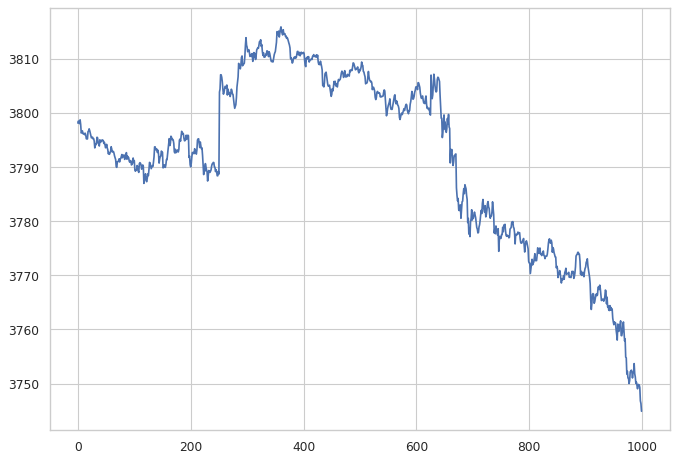

In [ ]:
plt.figure(figsize=(10, 7), dpi=80)
 
plt.plot(test['x4'])

In [ ]:
series = test['x4']
X = series.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

Calculating accuracy

In [ ]:
Tr = X[size:len(X)]
y_or1 = test_label[size:len(X)-1]
y_pr = []
y_or = []
c = 0
for i in range(len(predictions)-1):
  if (predictions[i+1][0]>=Tr[i]+c) or (predictions[i+1][0]<=Tr[i]-c): 
    if predictions[i+1][0]>=Tr[i]:
      y_pr.append(1)
    else:
      y_pr.append(0)
    y_or.append(y_or1[i])
len(y_pr)

499

In [ ]:
ans = 0
for i in range(len(y_pr)-1):
  if y_or[i]==y_pr[i]:
    ans = ans + 1
ans =  ans/len(y_or)
print(len(y_or))            # Number of test cases used
ans                         # Final accuracy


499


0.5751503006012024

Writing csv file

In [ ]:
def extractDigits(lst):
    return list(map(lambda el:[el], lst))
      
              

rows = extractDigits(y_pr)

In [ ]:

field = ['y'] 

    

filename = "last_500_points.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(field) 
        
    # writing the data rows 
    csvwriter.writerows(rows)
